In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('data/novagraph_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   _id                                132 non-null    object
 1   conversationNumber                 132 non-null    int64 
 2   questionNumber                     132 non-null    int64 
 3   input                              132 non-null    object
 4   translatedInput                    132 non-null    object
 5   originalInputResponse              132 non-null    object
 6   originalInputResponseVote          132 non-null    int64 
 7   expertOriginalInputResponseVote    132 non-null    int64 
 8   translatedInputResponse            132 non-null    object
 9   translatedInputResponseVote        132 non-null    int64 
 10  expertTranslatedInputResponseVote  132 non-null    int64 
 11  createdAt                          132 non-null    object
 12  updatedA

In [3]:
# Prepare data for radar chart
labels = ['Original User Vote', 'Translated User Vote', 'Original Expert Vote', 'Translated Expert Vote']

# Calculate the mean votes for original and translated responses (both user and expert feedback)
mean_original_user_vote = df['originalInputResponseVote'].mean()
mean_translated_user_vote = df['translatedInputResponseVote'].mean()

mean_original_expert_vote = df['expertOriginalInputResponseVote'].mean()
mean_translated_expert_vote = df['expertTranslatedInputResponseVote'].mean()

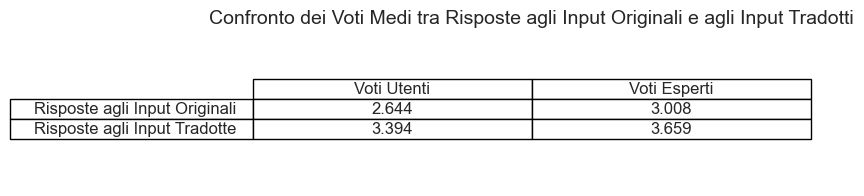

In [4]:
# Dati per la tabella
data = {
    'Voti Utenti': [round(mean_original_user_vote, 3), round(mean_translated_user_vote, 3)],
    'Voti Esperti': [round(mean_original_expert_vote, 3), round(mean_translated_expert_vote, 3)]
}

# Creazione del DataFrame
average_df = pd.DataFrame(data, index=['Risposte agli Input Originali', 'Risposte agli Input Tradotte'])

# Visualizzazione della tabella usando matplotlib
fig, ax = plt.subplots(figsize=(6, 2))  # Definisco la dimensione della figura

# Rimuovo gli assi
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Aggiungo la tabella
tabla = ax.table(cellText=average_df.values, colLabels=average_df.columns, rowLabels=average_df.index, loc='center', cellLoc='center')

# Rendo il testo della tabella più leggibile
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1.2, 1.2)

# Mostro la tabella
plt.title("Confronto dei Voti Medi tra Risposte agli Input Originali e agli Input Tradotti", fontsize=14)
plt.show()

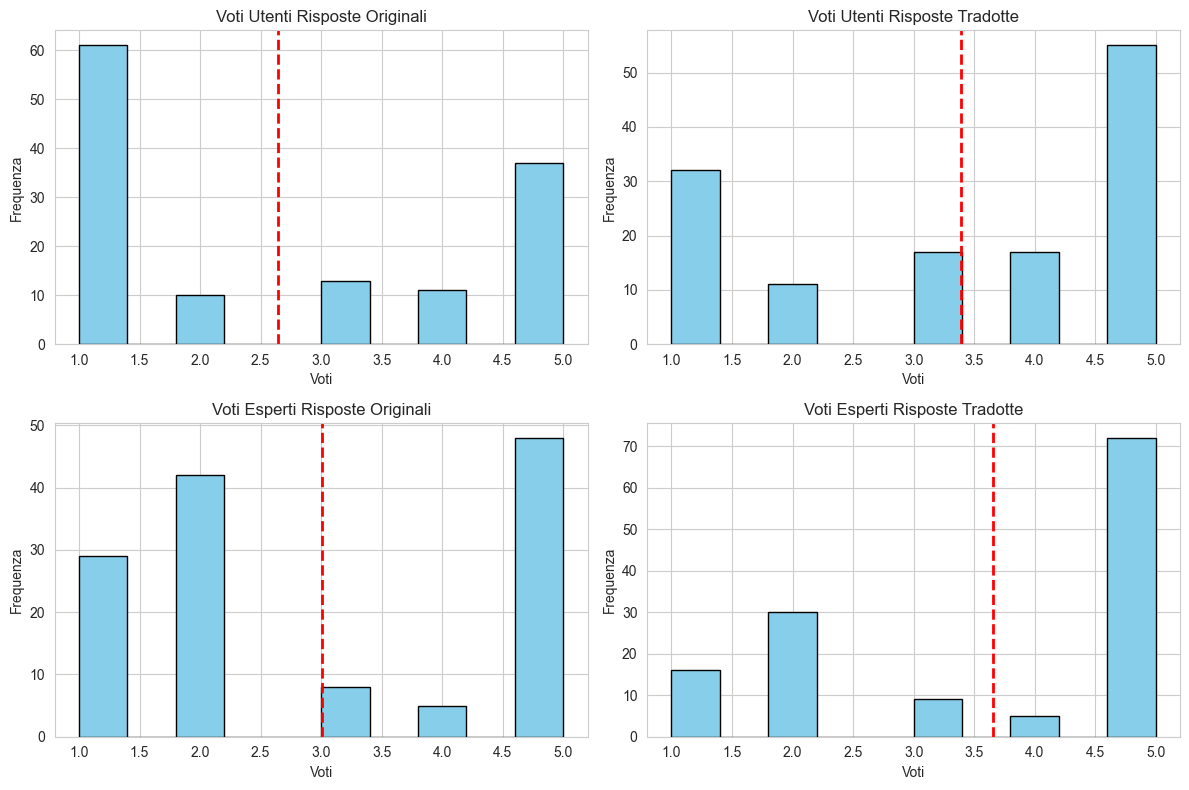

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Dati per gli istogrammi
votes_columns = [
    'originalInputResponseVote', 
    'translatedInputResponseVote', 
    'expertOriginalInputResponseVote', 
    'expertTranslatedInputResponseVote'
]

votes_titles = [
    'Voti Utenti Risposte Originali', 
    'Voti Utenti Risposte Tradotte', 
    'Voti Esperti Risposte Originali', 
    'Voti Esperti Risposte Tradotte'
]

# Calcolo delle medie per le 4 categorie di voti
votes_means = [
    df['originalInputResponseVote'].mean(), 
    df['translatedInputResponseVote'].mean(), 
    df['expertOriginalInputResponseVote'].mean(), 
    df['expertTranslatedInputResponseVote'].mean()
]

# Creazione dei grafici
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Due righe e due colonne di grafici
axes = axes.flatten()  # Flatten per iterare facilmente

# Creazione degli istogrammi
for i, column in enumerate(votes_columns):
    axes[i].hist(df[column], bins=10, color='skyblue', edgecolor='black')
    axes[i].axvline(votes_means[i], color='red', linestyle='dashed', linewidth=2)  # Riga rossa della media
    axes[i].set_title(votes_titles[i])
    axes[i].set_xlabel('Voti')
    axes[i].set_ylabel('Frequenza')

# Layout migliore per evitare sovrapposizioni
plt.tight_layout()
plt.show()

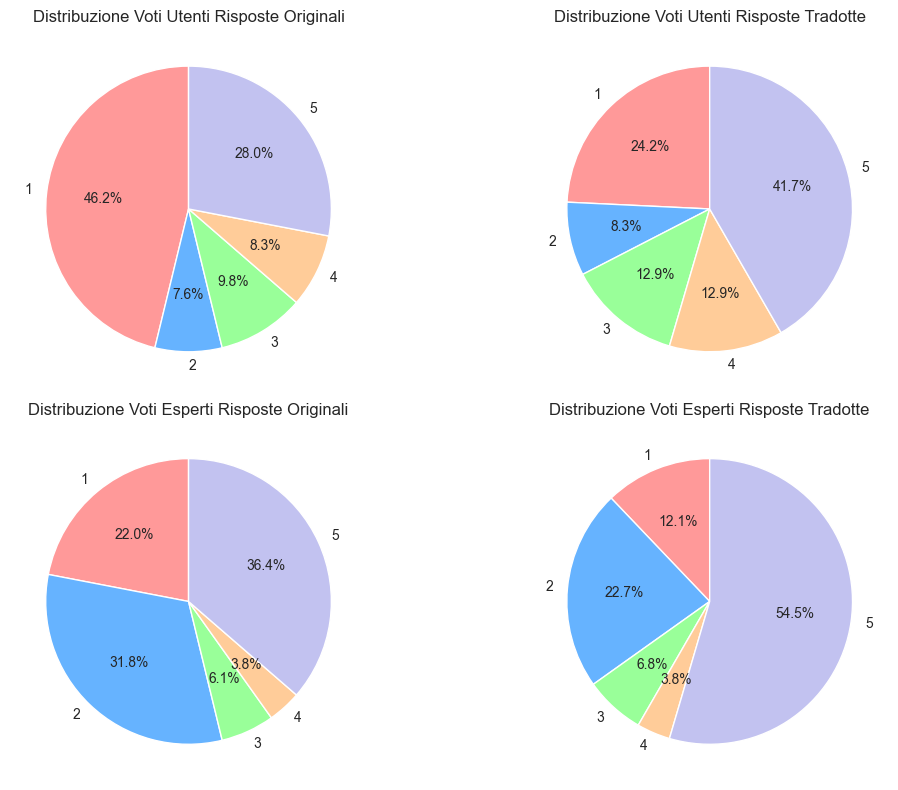

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Dati per i tipi di voto (1, 2, 3, 4, 5)
vote_values = [1, 2, 3, 4, 5]

# Dati per gli istogrammi
votes_columns = [
    'originalInputResponseVote', 
    'translatedInputResponseVote', 
    'expertOriginalInputResponseVote', 
    'expertTranslatedInputResponseVote'
]

# Titoli per i grafici a torta
votes_titles_pie = [
    'Distribuzione Voti Utenti Risposte Originali', 
    'Distribuzione Voti Utenti Risposte Tradotte', 
    'Distribuzione Voti Esperti Risposte Originali', 
    'Distribuzione Voti Esperti Risposte Tradotte'
]

# Creazione dei grafici a torta
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Loop su ciascun tipo di voto per creare il grafico a torta
for i, column in enumerate(votes_columns):
    vote_counts = [sum(df[column] == v) for v in vote_values]  # Conta la frequenza di ciascun voto
    axes[i].pie(vote_counts, labels=vote_values, autopct='%1.1f%%', startangle=90, 
                colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
    axes[i].set_title(votes_titles_pie[i])

# Imposta il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

In [7]:
# Raggruppamento per conversationNumber e calcolo della media dei voti
mean_votes_by_conversation = df.groupby('conversationNumber')[
    ['originalInputResponseVote', 'translatedInputResponseVote', 'expertOriginalInputResponseVote', 'expertTranslatedInputResponseVote']
].mean()

# Visualizzazione delle medie calcolate
print(mean_votes_by_conversation)

# Se vuoi salvare il risultato in un file CSV
mean_votes_by_conversation.to_csv('medie_voti_per_conversazione.csv', index=True)

                    originalInputResponseVote  translatedInputResponseVote  \
conversationNumber                                                           
1                                    3.450000                     4.100000   
2                                    2.400000                     2.300000   
3                                    2.625000                     2.750000   
4                                    2.416667                     2.750000   
5                                    2.000000                     3.153846   
6                                    3.363636                     3.727273   
7                                    3.333333                     3.666667   
8                                    2.818182                     3.545455   
9                                    3.272727                     3.727273   
10                                   1.500000                     3.416667   

                    expertOriginalInputResponseVote  \
conversa

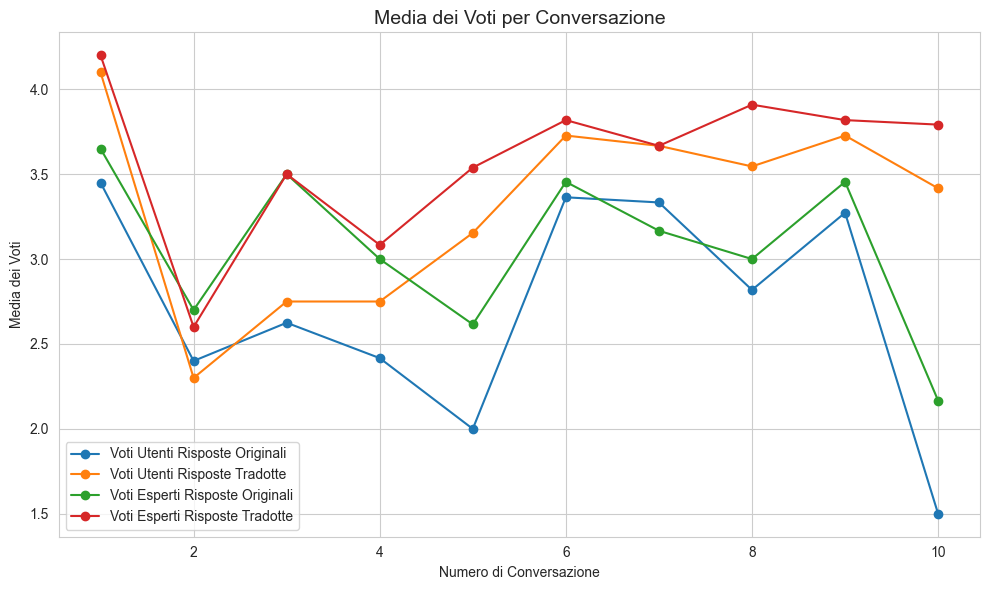

In [8]:
# Calcolo della media dei voti per ogni conversazione
mean_votes_by_conversation = df.groupby('conversationNumber')[
    ['originalInputResponseVote', 'translatedInputResponseVote', 'expertOriginalInputResponseVote', 'expertTranslatedInputResponseVote']
].mean()

# Creazione del grafico a linee
plt.figure(figsize=(10, 6))

# Linea per ogni tipo di voto
plt.plot(mean_votes_by_conversation.index, mean_votes_by_conversation['originalInputResponseVote'], 
         marker='o', label='Voti Utenti Risposte Originali')
plt.plot(mean_votes_by_conversation.index, mean_votes_by_conversation['translatedInputResponseVote'], 
         marker='o', label='Voti Utenti Risposte Tradotte')
plt.plot(mean_votes_by_conversation.index, mean_votes_by_conversation['expertOriginalInputResponseVote'], 
         marker='o', label='Voti Esperti Risposte Originali')
plt.plot(mean_votes_by_conversation.index, mean_votes_by_conversation['expertTranslatedInputResponseVote'], 
         marker='o', label='Voti Esperti Risposte Tradotte')

# Aggiunta di etichette e titolo
plt.title('Media dei Voti per Conversazione', fontsize=14)
plt.xlabel('Numero di Conversazione')
plt.ylabel('Media dei Voti')
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

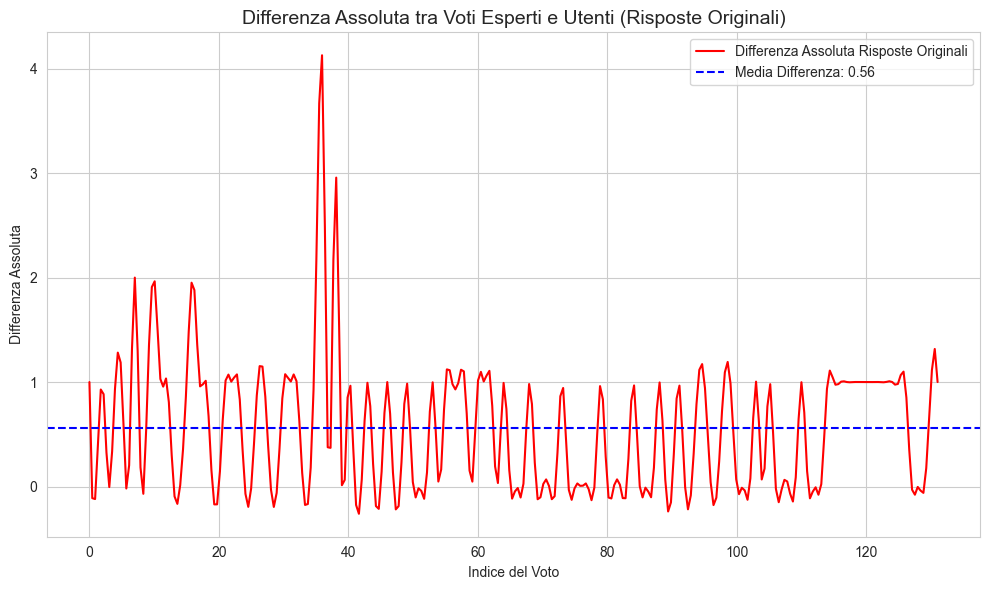

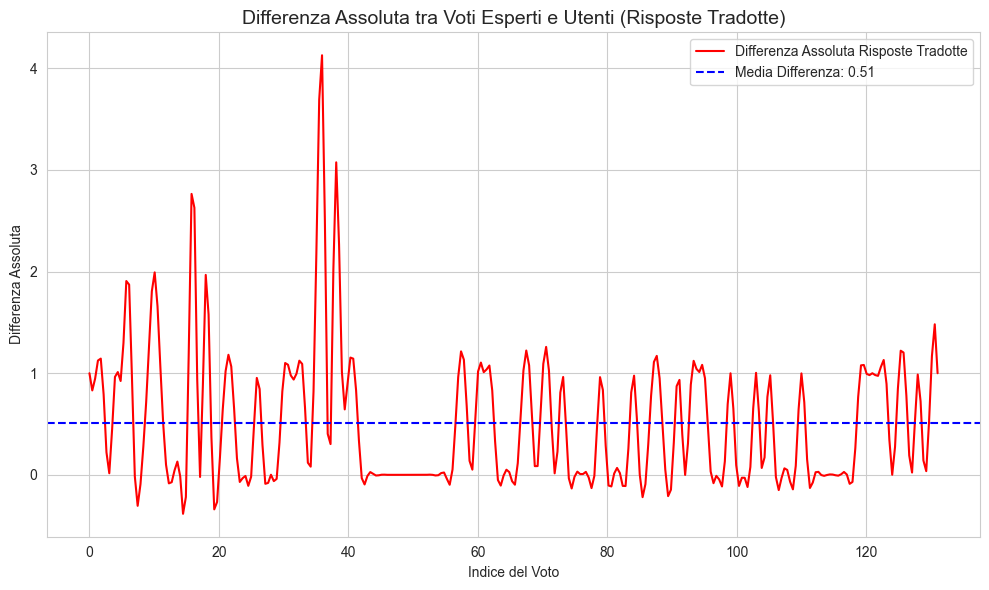

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Funzione per rendere le linee più morbide
def smooth_line(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)  # Più punti per una linea liscia
    spl = make_interp_spline(x, y, k=3)  # Interpolazione Cubica (k=3)
    y_smooth = spl(x_new)
    return x_new, y_smooth

# Calcolo delle differenze in valore assoluto
differenza_originale_abs = abs(df['expertOriginalInputResponseVote'] - df['originalInputResponseVote'])
differenza_tradotta_abs = abs(df['expertTranslatedInputResponseVote'] - df['translatedInputResponseVote'])

# Calcolo delle medie delle differenze
media_differenza_originale = np.mean(differenza_originale_abs)
media_differenza_tradotta = np.mean(differenza_tradotta_abs)

# Creazione del grafico per la differenza nelle risposte originali
plt.figure(figsize=(10, 6))

# Linea morbida per la differenza nelle risposte originali
x_smooth, y_smooth_originale = smooth_line(np.array(df.index), np.array(differenza_originale_abs))
plt.plot(x_smooth, y_smooth_originale, color='red', label='Differenza Assoluta Risposte Originali')

# Mostra la media come linea orizzontale
plt.axhline(media_differenza_originale, color='blue', linestyle='--', label=f'Media Differenza: {media_differenza_originale:.2f}')

# Aggiunta di etichette e titolo
plt.title('Differenza Assoluta tra Voti Esperti e Utenti (Risposte Originali)', fontsize=14)
plt.xlabel('Indice del Voto')
plt.ylabel('Differenza Assoluta')

# Aggiunta della legenda
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

# Creazione del grafico per la differenza nelle risposte tradotte
plt.figure(figsize=(10, 6))

# Linea morbida per la differenza nelle risposte tradotte
x_smooth, y_smooth_tradotta = smooth_line(np.array(df.index), np.array(differenza_tradotta_abs))
plt.plot(x_smooth, y_smooth_tradotta, color='red', label='Differenza Assoluta Risposte Tradotte')

# Mostra la media come linea orizzontale
plt.axhline(media_differenza_tradotta, color='blue', linestyle='--', label=f'Media Differenza: {media_differenza_tradotta:.2f}')

# Aggiunta di etichette e titolo
plt.title('Differenza Assoluta tra Voti Esperti e Utenti (Risposte Tradotte)', fontsize=14)
plt.xlabel('Indice del Voto')
plt.ylabel('Differenza Assoluta')

# Aggiunta della legenda
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

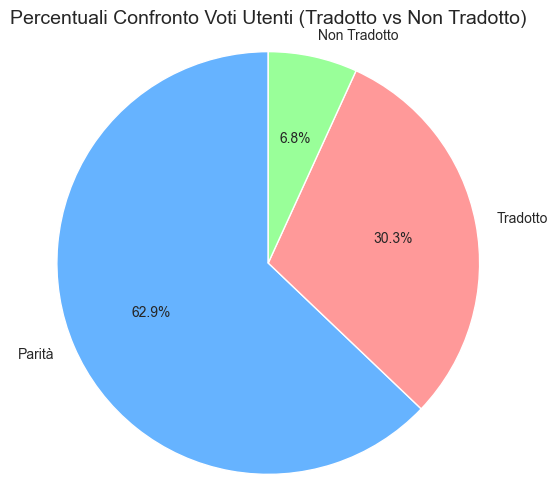

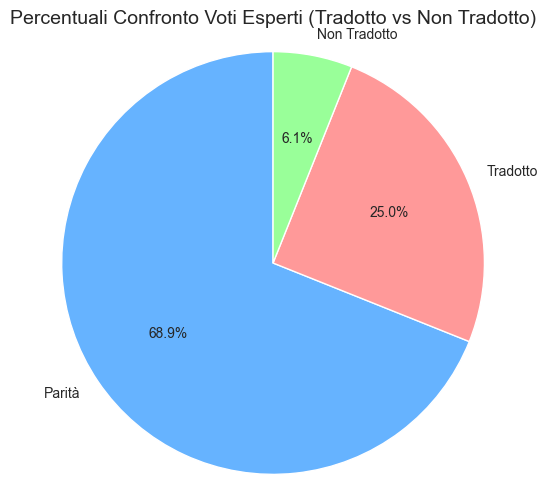

In [10]:
import matplotlib.pyplot as plt

# Funzione per confrontare i voti e restituire la categoria ("Tradotto", "Non Tradotto" o "Parità")
def confronta_voti(voto_tradotto, voto_non_tradotto):
    if voto_tradotto > voto_non_tradotto:
        return "Tradotto"
    elif voto_tradotto < voto_non_tradotto:
        return "Non Tradotto"
    else:
        return "Parità"

# Applicazione della funzione per i voti degli utenti
confronto_utenti = df.apply(lambda row: confronta_voti(row['translatedInputResponseVote'], row['originalInputResponseVote']), axis=1)

# Applicazione della funzione per i voti degli esperti
confronto_esperti = df.apply(lambda row: confronta_voti(row['expertTranslatedInputResponseVote'], row['expertOriginalInputResponseVote']), axis=1)

# Calcolo delle percentuali per gli utenti
percentuali_utenti = confronto_utenti.value_counts(normalize=True) * 100

# Calcolo delle percentuali per gli esperti
percentuali_esperti = confronto_esperti.value_counts(normalize=True) * 100

# Creazione del grafico a torta per gli utenti
plt.figure(figsize=(6, 6))
plt.pie(percentuali_utenti, labels=percentuali_utenti.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'], startangle=90)
plt.title('Percentuali Confronto Voti Utenti (Tradotto vs Non Tradotto)', fontsize=14)
plt.axis('equal')  # Assicura che il grafico sia un cerchio
plt.show()

# Creazione del grafico a torta per gli esperti
plt.figure(figsize=(6, 6))
plt.pie(percentuali_esperti, labels=percentuali_esperti.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999','#99ff99'], startangle=90)
plt.title('Percentuali Confronto Voti Esperti (Tradotto vs Non Tradotto)', fontsize=14)
plt.axis('equal')  # Assicura che il grafico sia un cerchio
plt.show()

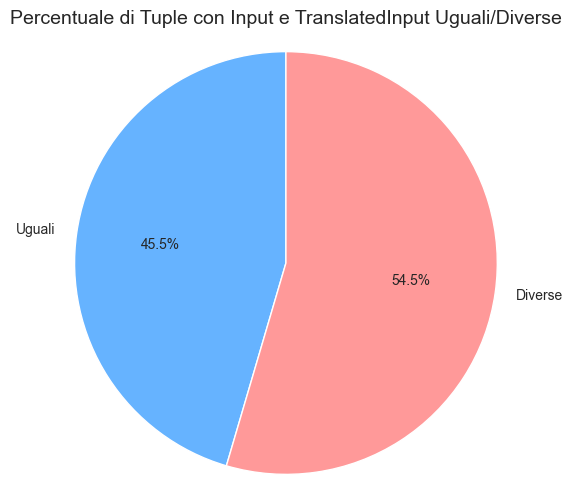

In [11]:
import matplotlib.pyplot as plt

# Calcolo delle percentuali delle tuple in cui 'input' e 'translatedInput' sono uguali o diverse
uguali = (df['input'] == df['translatedInput']).sum()
diverse = (df['input'] != df['translatedInput']).sum()

# Percentuali
percentuali = [uguali, diverse]
labels = ['Uguali', 'Diverse']

# Creazione del grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(percentuali, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Percentuale di Tuple con Input e TranslatedInput Uguali/Diverse', fontsize=14)
plt.axis('equal')  # Assicura che il grafico sia un cerchio
plt.show()


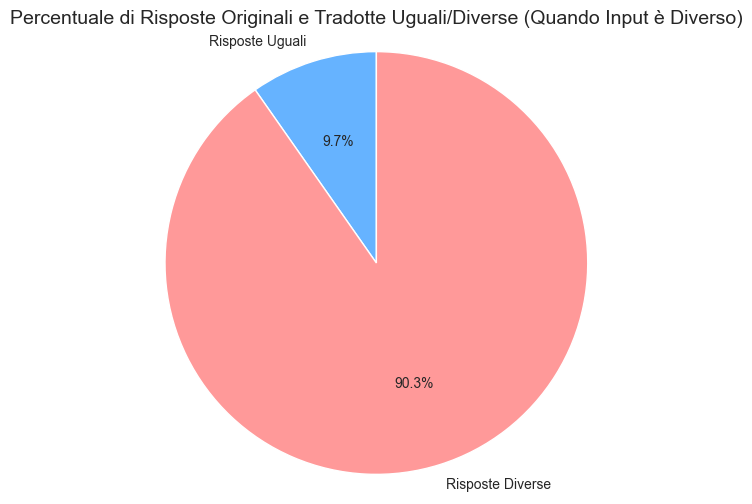

In [12]:
import matplotlib.pyplot as plt

# Filtriamo le tuple in cui 'input' e 'translatedInput' sono diversi
diverse_df = df[df['input'] != df['translatedInput']]

# Calcolo delle percentuali in cui 'originalInputResponse' e 'translatedInputResponse' sono uguali o diverse
uguali_risposte = (diverse_df['originalInputResponse'] == diverse_df['translatedInputResponse']).sum()
diverse_risposte = (diverse_df['originalInputResponse'] != diverse_df['translatedInputResponse']).sum()

# Percentuali per il nuovo confronto
percentuali_risposte = [uguali_risposte, diverse_risposte]
labels_risposte = ['Risposte Uguali', 'Risposte Diverse']

# Creazione del grafico a torta
plt.figure(figsize=(6, 6))
plt.pie(percentuali_risposte, labels=labels_risposte, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Percentuale di Risposte Originali e Tradotte Uguali/Diverse (Quando Input è Diverso)', fontsize=14)
plt.axis('equal')  # Assicura che il grafico sia un cerchio
plt.show()


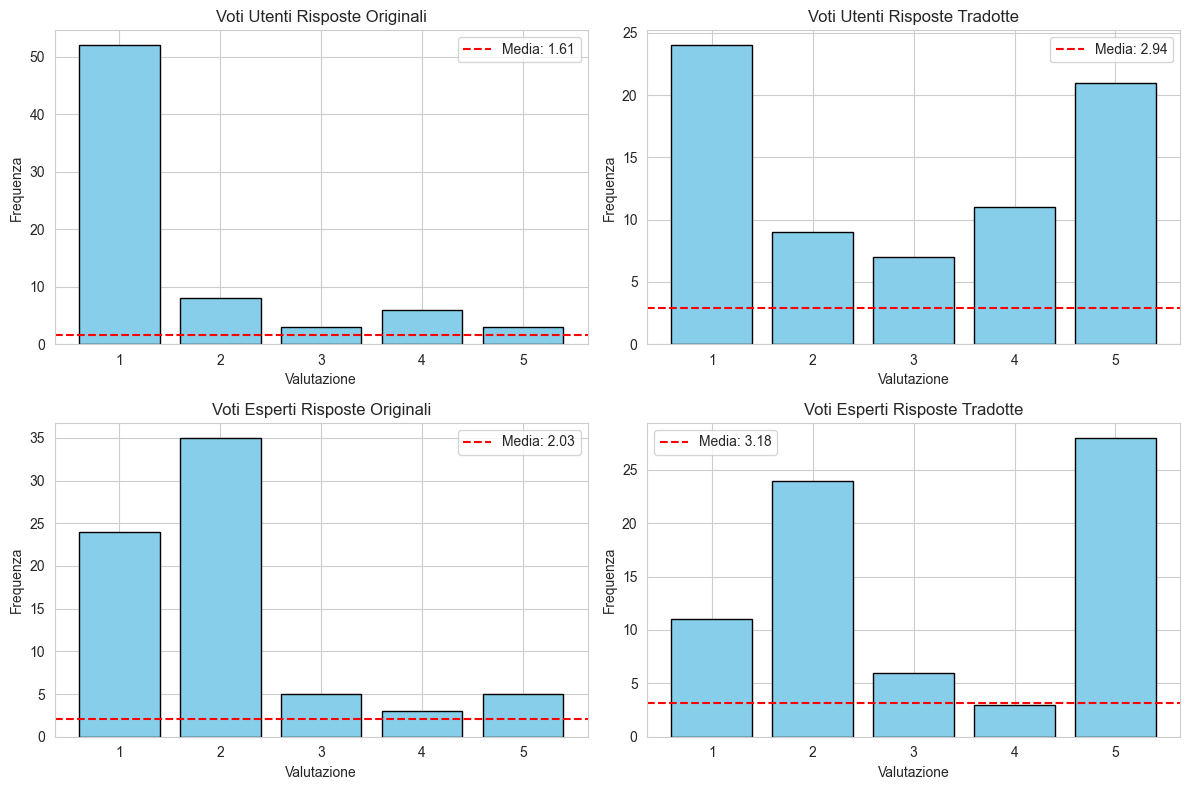

In [13]:
import matplotlib.pyplot as plt

# Filtriamo le tuple in cui 'input' e 'translatedInput' sono diversi
diverse_df = df[df['input'] != df['translatedInput']]

# Definiamo le colonne di interesse
columns = ['originalInputResponseVote', 'translatedInputResponseVote', 'expertOriginalInputResponseVote', 'expertTranslatedInputResponseVote']
titles = ['Voti Utenti Risposte Originali', 'Voti Utenti Risposte Tradotte', 'Voti Esperti Risposte Originali', 'Voti Esperti Risposte Tradotte']

# Creazione del grafico a 4
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Loop su ciascuna colonna
for i, column in enumerate(columns):
    # Conteggio delle valutazioni 1, 2, 3, 4, 5
    counts = diverse_df[column].value_counts().sort_index()
    
    # Media delle valutazioni
    media_valutazioni = diverse_df[column].mean()
    
    # Creazione dell'istogramma
    axes[i].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    axes[i].axhline(media_valutazioni, color='red', linestyle='--', label=f'Media: {media_valutazioni:.2f}')
    
    # Impostazioni del grafico
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Valutazione')
    axes[i].set_ylabel('Frequenza')
    axes[i].legend()

# Imposta un layout migliore
plt.tight_layout()
plt.show()


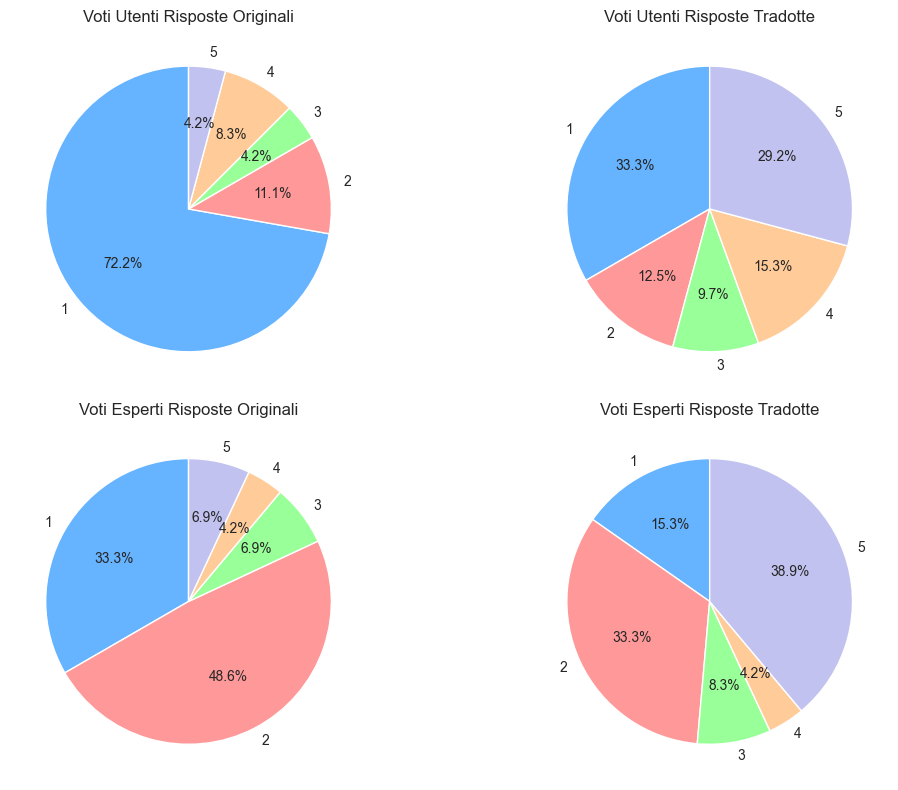

In [14]:
import matplotlib.pyplot as plt

# Definiamo le colonne di interesse
columns = ['originalInputResponseVote', 'translatedInputResponseVote', 'expertOriginalInputResponseVote', 'expertTranslatedInputResponseVote']
titles = ['Voti Utenti Risposte Originali', 'Voti Utenti Risposte Tradotte', 'Voti Esperti Risposte Originali', 'Voti Esperti Risposte Tradotte']

# Creazione del grafico a torta per ogni tipo di valutazione
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Loop su ciascuna colonna
for i, column in enumerate(columns):
    # Conteggio delle valutazioni 1, 2, 3, 4, 5
    counts = diverse_df[column].value_counts().sort_index()
    
    # Creazione del grafico a torta
    axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#99ff99','#ffcc99','#c2c2f0'])
    
    # Impostazioni del grafico
    axes[i].set_title(titles[i])

# Imposta un layout migliore
plt.tight_layout()
plt.show()


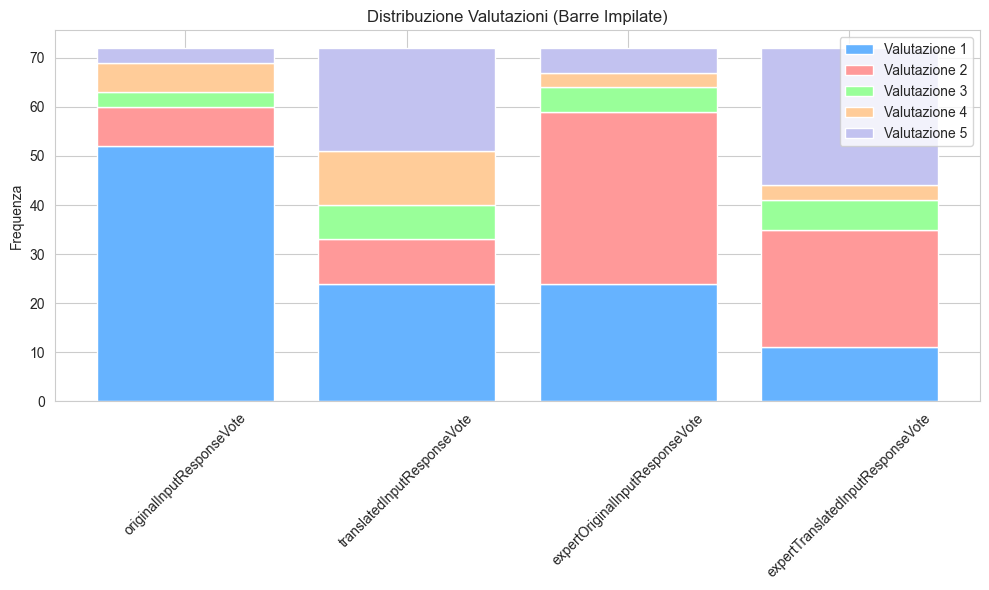

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Definiamo le colonne di interesse
columns = ['originalInputResponseVote', 'translatedInputResponseVote', 'expertOriginalInputResponseVote', 'expertTranslatedInputResponseVote']
titles = ['Voti Utenti Risposte Originali', 'Voti Utenti Risposte Tradotte', 'Voti Esperti Risposte Originali', 'Voti Esperti Risposte Tradotte']

# Conteggio delle valutazioni per ogni tipo di voto
voti = {col: diverse_df[col].value_counts().sort_index() for col in columns}

# Creazione del grafico a barre impilate
fig, ax = plt.subplots(figsize=(10, 6))

# Definizione dei voti (1, 2, 3, 4, 5)
vote_values = [1, 2, 3, 4, 5]

# Stacking delle barre
bottom = np.zeros(len(columns))
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0']
for i, vote in enumerate(vote_values):
    counts = [voti[col].get(vote, 0) for col in columns]
    ax.bar(columns, counts, bottom=bottom, color=colors[i], label=f'Valutazione {vote}')
    bottom += counts

# Impostazioni del grafico
ax.set_title('Distribuzione Valutazioni (Barre Impilate)')
ax.set_ylabel('Frequenza')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


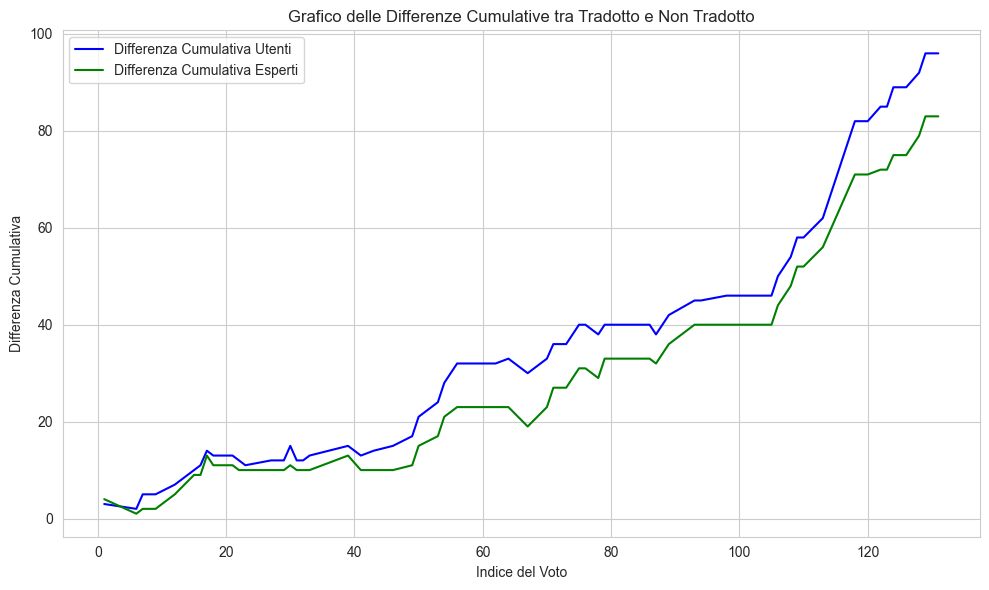

In [16]:
# Calcolo delle differenze cumulative tra tradotto e non tradotto
diff_cumulative_utenti = np.cumsum(diverse_df['translatedInputResponseVote'] - diverse_df['originalInputResponseVote'])
diff_cumulative_esperti = np.cumsum(diverse_df['expertTranslatedInputResponseVote'] - diverse_df['expertOriginalInputResponseVote'])

# Creazione del grafico delle differenze cumulative
plt.figure(figsize=(10, 6))

# Linea per la differenza cumulativa degli utenti
plt.plot(diverse_df.index, diff_cumulative_utenti, label='Differenza Cumulativa Utenti', color='blue')

# Linea per la differenza cumulativa degli esperti
plt.plot(diverse_df.index, diff_cumulative_esperti, label='Differenza Cumulativa Esperti', color='green')

# Impostazioni del grafico
plt.title('Grafico delle Differenze Cumulative tra Tradotto e Non Tradotto')
plt.xlabel('Indice del Voto')
plt.ylabel('Differenza Cumulativa')
plt.legend()
plt.tight_layout()
plt.show()


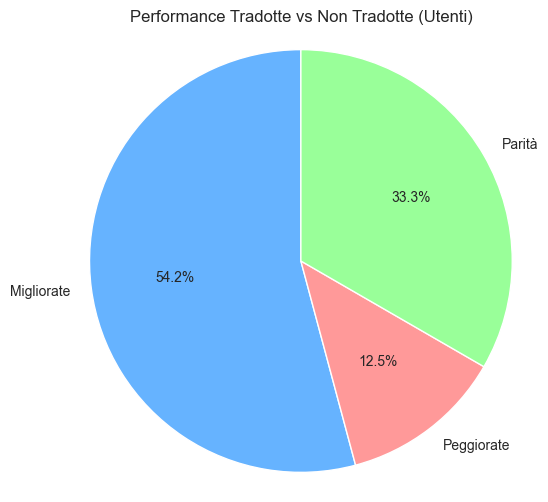

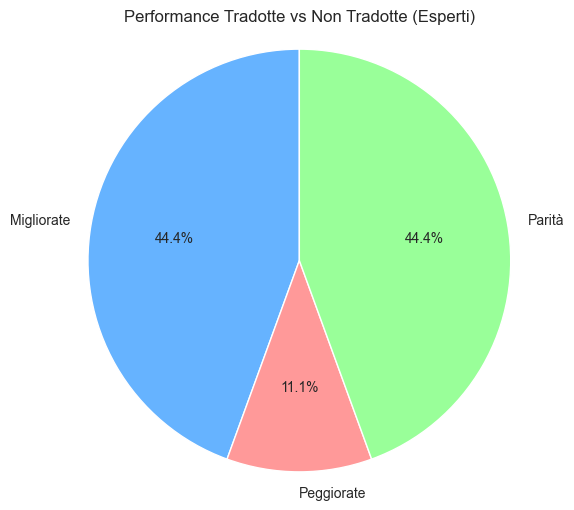

In [17]:
# Calcolo delle performance migliorate e peggiorate per gli utenti
migliorate_utenti = (diverse_df['translatedInputResponseVote'] > diverse_df['originalInputResponseVote']).sum()
peggiorate_utenti = (diverse_df['translatedInputResponseVote'] < diverse_df['originalInputResponseVote']).sum()
parita_utenti = (diverse_df['translatedInputResponseVote'] == diverse_df['originalInputResponseVote']).sum()

# Creazione del grafico a torta per le performance degli utenti
plt.figure(figsize=(6, 6))
plt.pie([migliorate_utenti, peggiorate_utenti, parita_utenti], labels=['Migliorate', 'Peggiorate', 'Parità'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'], startangle=90)
plt.title('Performance Tradotte vs Non Tradotte (Utenti)')
plt.axis('equal')
plt.show()

# Calcolo delle performance migliorate e peggiorate per gli esperti
migliorate_esperti = (diverse_df['expertTranslatedInputResponseVote'] > diverse_df['expertOriginalInputResponseVote']).sum()
peggiorate_esperti = (diverse_df['expertTranslatedInputResponseVote'] < diverse_df['expertOriginalInputResponseVote']).sum()
parita_esperti = (diverse_df['expertTranslatedInputResponseVote'] == diverse_df['expertOriginalInputResponseVote']).sum()

# Creazione del grafico a torta per le performance degli esperti
plt.figure(figsize=(6, 6))
plt.pie([migliorate_esperti, peggiorate_esperti, parita_esperti], labels=['Migliorate', 'Peggiorate', 'Parità'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'], startangle=90)
plt.title('Performance Tradotte vs Non Tradotte (Esperti)')
plt.axis('equal')
plt.show()